In [1]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2022-12-29 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A_python_basic_course
# # @IDE     : Python 3.9.16 (main, Dec  7 2022, 10:15:43) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
# # @File    : lec2_step05.py 

In [2]:
# module test: if you have an error when you run this code, 
# you need to check the installation status of those modules

import math 
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.cm as cm
import matplotlib as mp
import tkinter as tk

In [53]:
# you need run this code, if you want to use external windows to visulalize
import matplotlib.pyplot as plt
%matplotlib tk

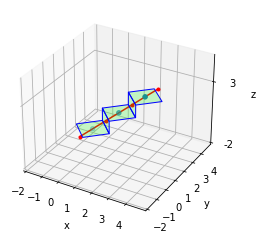

In [6]:

import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
pRange=np.array([-2,5])
enlargedR=10

line_points=np.array([[0,0, 0],
                  [1, 1, 1 ],
                  [2, 2, 2],
                     [3, 3, 3]])

axes = plt.figure(1).add_subplot(projection='3d')

axes.plot(line_points[:,0],line_points[:,1],line_points[:,2],'r.-')

inN=len(line_points)-1
# dv_xy_full=np.full((inN,3),0,dtype=np.double)
# dt_xy_full=np.full((inN,3),0,dtype=np.double)
dv_xy_full=np.full((inN,2),0,dtype=np.double)
dt_xy_full=np.full((inN,2),0,dtype=np.double)

xd=np.array([1,-1,-1,1])
yd=np.array([1,1,-1,-1])
for k in range(inN):
    dVec=line_points[k+1]-line_points[k]
    dAve=(line_points[k+1]+line_points[k])/2
    dAve_xy=dAve.copy()
    dAve_xy[2]=0
    dv_xy=np.array(dVec[:2],dtype=np.double)/2
    dt_xy=np.roll(dv_xy,1)*[1,-1]
    dv_xy_full[k,:]=dv_xy
    dt_xy_full[k,:]=dt_xy
    
    tangFace=np.tile(xd,[2,1])*np.tile(np.transpose([dv_xy]),[1,4])+np.tile(yd,[2,1])*np.tile(np.transpose([dt_xy]),[1,4])
    tangFace2=np.vstack([tangFace,np.tile(dAve[2],[1,4])])+np.tile(np.transpose([dAve_xy]),(1,4))
    tangFaceT=np.transpose(tangFace2)

    if k==0:
        frame_points=dAve
        vertices=[tangFaceT.tolist()]
#         tgv=vn_np[node_vec-1]
    else:
        frame_points=np.vstack([frame_points,dAve])
        vertices=np.vstack([vertices,[tangFaceT.tolist()]])
#         tgv=np.vstack([tgv,vn_np[node_vec-1]])

inN_m=len(vertices)-1
dv_xy_full_m=np.full((inN_m,2),0,dtype=np.double)
dt_xy_full_m=np.full((inN_m,2),0,dtype=np.double)
for k in range(inN_m):
    tFace1=vertices[k]
    tFace2=vertices[k+1]
    tangFaceT=np.vstack([tFace1[3],tFace1[0],tFace2[1],tFace2[2]])
    vertices=np.vstack([vertices,[tangFaceT.tolist()]])
    dv_xy_full_m[k]=dv_xy_full[k+1]
    dt_xy_full_m[k]=dt_xy_full[k+1]

axes.scatter3D(frame_points[:, 0], frame_points[:, 1], frame_points[:, 2])

axes.add_collection3d(Poly3DCollection(vertices, facecolors='lime', linewidths=1, edgecolors='b', alpha=0.2))

plt.xticks(np.arange(pRange[0], pRange[1], 1))
plt.yticks(np.arange(pRange[0], pRange[1], 1))

axes.set_zticks(np.arange(pRange[0], pRange[1], 5))
axes.set_zticklabels(np.arange(pRange[0], pRange[1], 5),fontsize=10)

axes.set_xlim(pRange)
axes.set_ylim(pRange)
axes.set_zlim(pRange)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

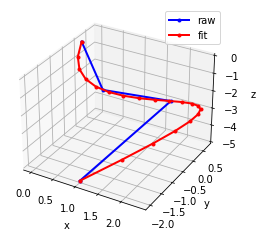

In [7]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


x = [0,1, 2, 1]
y = [0, -1, 0, -2]
z = [0, -1, -2, -5]

dataD = [x,y,z]

tck, u= interpolate.splprep(dataD, k=3)

dataINP = interpolate.splev(np.linspace(0,1,20), tck, der=0)

axes = plt.figure(2).add_subplot(projection='3d')

axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

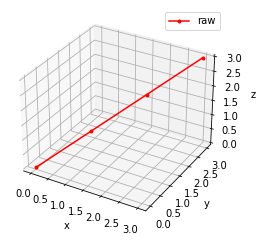

In [11]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt



line_points=np.array([[0,0, 0],
                  [1, 1, 1 ],
                  [2, 2, 2],
                     [3, 3, 3]])

axes = plt.figure(3).add_subplot(projection='3d')

axes.plot(line_points[:,0],line_points[:,1],line_points[:,2],'r.-',label='raw')


# axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
# axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

In [12]:
line_points

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [15]:
line_points_prim=[line_points]
line_point_full=np.vstack([line_points_prim,line_points_prim,line_points_prim])
line_point_full

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]])

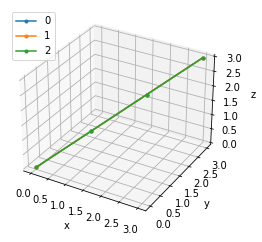

In [20]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt



line_points=np.array([[0,0, 0],
                  [1, 1, 1 ],
                  [2, 2, 2],
                     [3, 3, 3]])

line_points_prim=[line_points]
line_point_full=np.vstack([line_points_prim,line_points_prim,line_points_prim])
line_point_full

axes = plt.figure(3).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[0][:,0],line_point_full[0][:,1],line_point_full[0][:,2],'.-',label=str(k))


# axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
# axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

In [26]:
point_list[0]=[[0,0, 0],[1, 1, 1 ],[2, 2, 2],[3, 3, 3]]
point_list[1]=[[0,0, 0],[1, 1, 1 ],[2, 2, 2],[3, 3, 3]]
point_list[2]=[[0,0, 0],[1, 1, 1 ],[2, 2, 2],[3, 3, 3]]
point_list[3]=[[0,0, 0],[1, 1, 1 ],[2, 2, 2],[3, 3, 3]]


In [61]:

point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 0 ],[12, 0, 1]]
point_list[2]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[3]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

line_points=np.array([[0,0, 0],
                  [1, 1, 1 ],
                  [2, 2, 2],
                     [3, 3, 3]])
for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

print(len(point_list))
# print(line_point_full)
line_point_full

4


array([[[ 0,  0,  0],
        [ 3,  0,  0],
        [ 6,  0,  0],
        [12,  0,  0]],

       [[ 0,  0,  1],
        [ 3,  0,  1],
        [ 6,  0,  0],
        [12,  0,  1]],

       [[ 0,  1,  1],
        [ 3,  1,  1],
        [ 6,  1,  1],
        [12,  1,  1]],

       [[ 0,  1,  0],
        [ 3,  1,  0],
        [ 6,  1,  0],
        [12,  1,  0]]])

In [66]:
base_id=0
bline=line_point_full[base_id].copy()
bline

array([[ 0,  0,  0],
       [ 3,  0,  0],
       [ 6,  0,  0],
       [12,  0,  0]])

In [294]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])


point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[2]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[3]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
#=================================

axes = plt.figure(3).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)

    
    
# axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
# axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

In [199]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])


point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[2]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[3]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)
tgv=np.full((6,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    if kk==0:
        tgv[kk]=line_edgePst/normV(line_edgePst)
    else:
        tgv[kk]=-line_edgePst/normV(line_edgePst)
#=================================

axes = plt.figure(4).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)
    

vertices=line_edge_full2[:,:-1,:].copy()
    
for k in range(len(vertices)):
    axes.quiver(np.mean(vertices[k][:,0]), np.mean(vertices[k][:,1]),np.mean(vertices[k][:,2]), tgv[k][0],  tgv[k][1],  tgv[k][2], length=1, normalize=True)
    
    
# axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
# axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

In [316]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])


point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[3]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[2]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
disVarray = lambda v:np.sum(np.square(v),axis=1)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)
normVarray= lambda v: [np.linalg.norm(d, ord=2) for d in v]

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)
tgv=np.full((2,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    if kk==0:
        tgv[kk]=line_edgePst/normV(line_edgePst)
    else:
        tgv[kk]=-line_edgePst/normV(line_edgePst)
        
#=================================
# correction of twisted loop

for kk in range(len(EdgeID)):
    aP=line_edge_full2[kk][bID]
    mP=(np.where(disVarray(line_edge_full2[kk][:]-aP)==max(disVarray(line_edge_full2[kk][:]-aP)))[0])[0]
#     print(mP)
    if mP!=2:
        P2=line_edge_full2[kk][mP].copy()
        P3=line_edge_full2[kk][2].copy()
        line_edge_full2[kk][2]=P2
        line_edge_full2[kk][mP]=P3

vertices=line_edge_full2[:,:-1,:].copy()
        
#=================================

fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
fID3=[[1,2],[2,3],[3,0],[0,1]]

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
vertices=np.vstack([vertices,np.array(tmpPf)])

tmpT=[(line_edge_full2[0][tag[1]]-line_edge_full2[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])
#=================================


axes = plt.figure(5).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)
    
axes.add_collection3d(Poly3DCollection(vertices, facecolors='lime', linewidths=1, edgecolors='b', alpha=0.2))
    
for k in range(len(vertices)):
    axes.quiver(np.mean(vertices[k][:,0]), np.mean(vertices[k][:,1]),np.mean(vertices[k][:,2]), tgv[k][0],  tgv[k][1],  tgv[k][2], length=0.25, normalize=True)
    
    
# axes.plot(dataD[0], dataD[1], dataD[2],'.-', label='raw', lw =2, c='blue')
# axes.plot(dataINP[0], dataINP[1], dataINP[2],'.-', label='fit', lw =2, c='red')
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')


plt.show()

In [307]:
tgv

array([[ 1.,  0.,  0.],
       [-1., -0., -0.]])

In [302]:
print(len(vertices))
print(len(tgv))
tgv

6
10


array([[ 1.,  0.,  0.],
       [-1., -0., -0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., -1.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [397]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])


point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[3]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[2]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
disVarray = lambda v:np.sum(np.square(v),axis=1)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)
normVarray= lambda v: [np.linalg.norm(d, ord=2) for d in v]
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)
tgv=np.full((2,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    if kk==0:
        tgv[kk]=line_edgePst/normV(line_edgePst)
    else:
        tgv[kk]=-line_edgePst/normV(line_edgePst)
        
#=================================
# correction of twisted loop

for kk in range(len(EdgeID)):
    aP=line_edge_full2[kk][bID]
    mP=(np.where(disVarray(line_edge_full2[kk][:]-aP)==max(disVarray(line_edge_full2[kk][:]-aP)))[0])[0]
#     print(mP)
    if mP!=2:
        P2=line_edge_full2[kk][mP].copy()
        P3=line_edge_full2[kk][2].copy()
        line_edge_full2[kk][2]=P2
        line_edge_full2[kk][mP]=P3

vertices=line_edge_full2[:,:-1,:].copy()
        
#=================================

fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
fID3=[[1,2],[2,3],[3,0],[0,1]]

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
vertices=np.vstack([vertices,np.array(tmpPf)])

tmpT=[(line_edge_full2[0][tag[1]]-line_edge_full2[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])

#============random box=============

originalNd=len(vertices)

regD=np.array([0.5,0.5,0.5])
shiftD=np.array([6,0.5,0.5])
reSz=0.2

rboxF1=[[0,0,0],[0,0,1],[0,1,1],[0,1,0]]
rboxF2=[[1,0,0],[1,0,1],[1,1,1],[1,1,0]]
rboxF=np.array([rboxF1,rboxF2])
# rboxF
addD1=reSz*(rboxF-regD)+shiftD
# vertices=np.vstack([vertices,addD])

normVec=[[1,0,0],[-1,0,0]]
tgv=np.vstack([tgv,np.array(normVec)])

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[rboxF[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
addD2=reSz*(np.array(tmpPf)-regD)+shiftD
vertices=np.vstack([vertices,addD1])
vertices=np.vstack([vertices,addD2])

tmpT=[(rboxF[0][tag[1]]-rboxF[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])

#=================================


axes = plt.figure(6).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)
    
axes.add_collection3d(Poly3DCollection(vertices, facecolors='lime', linewidths=1, edgecolors='b', alpha=0.2))
    
for k in range(len(vertices)):
    axes.quiver(np.mean(vertices[k][:,0]), np.mean(vertices[k][:,1]),np.mean(vertices[k][:,2]), tgv[k][0],  tgv[k][1],  tgv[k][2], length=0.25, normalize=True)
    
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')


plt.show()

print(originalNd)
print(len(vertices))




6
12


In [385]:
addD=np.vstack([addD1,addD2])
addD

array([[[5.9, 0.4, 0.4],
        [5.9, 0.4, 0.6],
        [5.9, 0.6, 0.6],
        [5.9, 0.6, 0.4]],

       [[6.1, 0.4, 0.4],
        [6.1, 0.4, 0.6],
        [6.1, 0.6, 0.6],
        [6.1, 0.6, 0.4]],

       [[5.9, 0.4, 0.4],
        [5.9, 0.4, 0.6],
        [6.1, 0.4, 0.6],
        [6.1, 0.4, 0.4]],

       [[5.9, 0.4, 0.6],
        [5.9, 0.6, 0.6],
        [6.1, 0.6, 0.6],
        [6.1, 0.4, 0.6]],

       [[5.9, 0.6, 0.6],
        [5.9, 0.6, 0.4],
        [6.1, 0.6, 0.4],
        [6.1, 0.6, 0.6]],

       [[5.9, 0.6, 0.4],
        [5.9, 0.4, 0.4],
        [6.1, 0.4, 0.4],
        [6.1, 0.6, 0.4]]])

In [419]:
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))
ioFv=lambda tP: [ioF(tgv[ki],tP,vertices[ki,0,:]) for ki in range(originalNd)]

addD=np.vstack([addD1,addD2])

sP=rboxF
sP=addD+np.array([-10,0,0])
sP=addD

sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
ioF3=not(False in (np.array(ioF2)>0).tolist())

print(ioF3)



True


In [414]:
[d[0].tolist() for d in rboxF]

sP=rboxF
np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 0]])

In [521]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])

pRange_x=np.array([2,10])
pRange_yz=np.array([-1,2])

point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[3]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[2]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
disVarray = lambda v:np.sum(np.square(v),axis=1)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)
normVarray= lambda v: [np.linalg.norm(d, ord=2) for d in v]
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)
tgv=np.full((2,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    if kk==0:
        tgv[kk]=line_edgePst/normV(line_edgePst)
    else:
        tgv[kk]=-line_edgePst/normV(line_edgePst)
        
#=================================
# correction of twisted loop

for kk in range(len(EdgeID)):
    aP=line_edge_full2[kk][bID]
    mP=(np.where(disVarray(line_edge_full2[kk][:]-aP)==max(disVarray(line_edge_full2[kk][:]-aP)))[0])[0]
#     print(mP)
    if mP!=2:
        P2=line_edge_full2[kk][mP].copy()
        P3=line_edge_full2[kk][2].copy()
        line_edge_full2[kk][2]=P2
        line_edge_full2[kk][mP]=P3

vertices=line_edge_full2[:,:-1,:].copy()
        
#=================================

fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
fID3=[[1,2],[2,3],[3,0],[0,1]]

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
vertices=np.vstack([vertices,np.array(tmpPf)])

tmpT=[(line_edge_full2[0][tag[1]]-line_edge_full2[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])

#============random box=============

originalNd=len(vertices)

regD=np.array([0.5,0.5,0.5])
shiftD=np.array([6,0.5,0.5])
reSz=0.2

rboxF1=[[0,0,0],[0,0,1],[0,1,1],[0,1,0]]
rboxF2=[[1,0,0],[1,0,1],[1,1,1],[1,1,0]]
rboxF=np.array([rboxF1,rboxF2])
# rboxF

kgP=0
rN=10
randP=(2*(np.random.rand(rN,3)-0.5))*[5,1,1]+[6,0.5,0.5]
# randP=(2*(np.random.rand(rN,3)-0.5))*[10,5,5]
# randP=(2*(np.random.rand(rN,3)-0.5))*[3,0.5,0.5]+[6,0.5,0.5]
for kg in range(len(randP)):
    shiftD=randP[kg]
    addD1=reSz*(rboxF-regD)+shiftD
    # vertices=np.vstack([vertices,addD])

    normVec=[[1,0,0],[-1,0,0]]
    tgv=np.vstack([tgv,np.array(normVec)])

    tmpPf=[]
    for km in range(len(fID1)):
        tmpP=[rboxF[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
        tmpPf.append(tmpP)

    addD2=reSz*(np.array(tmpPf)-regD)+shiftD


    # check whether the generated random box is inside or outside of the area
    
    ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))
    ioFv=lambda tP: [ioF(tgv[ki],tP,vertices[ki,0,:]) for ki in range(originalNd)]

    addD=np.vstack([addD1,addD2])

    sP=addD
    sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
    ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
    ioF3=not(True in ioF2)
    
    
# ===
    if ioF3:
        kgP=kgP+1
#         print(kgP)
#         print((ioF3))
#         addD=np.vstack([addD1,addD2])

        tmpT=[(rboxF[0][tag[1]]-rboxF[0][tag[0]]).tolist() for tag in fID3]
        normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

        vertices=np.vstack([vertices,addD])
        tgv=np.vstack([tgv,np.array(normVec)])
        addDpre=addD.copy()

#=================================
print(kgP)
# print(not(ioF3))

axes = plt.figure(7).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)
    
axes.add_collection3d(Poly3DCollection(vertices, facecolors='lime', linewidths=1, edgecolors='b', alpha=0.2))
    
for k in range(len(vertices)):
    axes.quiver(np.mean(vertices[k][:,0]), np.mean(vertices[k][:,1]),np.mean(vertices[k][:,2]), tgv[k][0],  tgv[k][1],  tgv[k][2], length=0.25, normalize=True)
    
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')


plt.show()

# print(originalNd)
# print(len(vertices))




False
False
False
False
False
False
False
False
8


In [526]:
from scipy import interpolate
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

pRange_x=np.array([-1,15])
pRange_yz=np.array([-1,2])

pRange_x=np.array([1,10])
pRange_yz=np.array([-2,5])

point_list[0]=[[0,0, 0],[3, 0, 0 ],[6, 0, 0 ],[12, 0, 0]]
point_list[1]=[[0,0, 1],[3, 0, 1 ],[6, 0, 1 ],[12, 0, 1]]
point_list[3]=[[0,1, 1],[3, 1, 1 ],[6, 1, 1 ],[12, 1, 1]]
point_list[2]=[[0,1, 0],[3, 1, 0 ],[6, 1, 0 ],[12, 1, 0]]

for k in range(len(point_list)):
    line_points_prim=np.array([point_list[k]])
    if k==0:
        line_point_full=line_points_prim
    else:
        line_point_full=np.vstack([line_point_full,line_points_prim])
# line_point_full

for k in range(len(line_point_full)):
    line_point_full[k]=line_point_full[k]+np.array([k,0,0])
    
#====== calc for connecting vectors   ======

# base_id=0

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
disVarray = lambda v:np.sum(np.square(v),axis=1)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)
normVarray= lambda v: [np.linalg.norm(d, ord=2) for d in v]
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)
tV=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
    
bID=0
line_edge_full2=np.full((2,len(line_point_full)+1,3),0,dtype=np.double)
tgv=np.full((2,3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[bID][km+1]
    aP=line_point_full[bID][km]
    cP=line_point_full[ki][km]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
#     line_edgePst=aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[kj][km+1]
            aP=line_point_full[kj][km]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
#             line_edgeP=aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])

#     line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,cP])
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    if kk==0:
        tgv[kk]=line_edgePst/normV(line_edgePst)
    else:
        tgv[kk]=-line_edgePst/normV(line_edgePst)
        
#=================================
# correction of twisted loop

for kk in range(len(EdgeID)):
    aP=line_edge_full2[kk][bID]
    mP=(np.where(disVarray(line_edge_full2[kk][:]-aP)==max(disVarray(line_edge_full2[kk][:]-aP)))[0])[0]
#     print(mP)
    if mP!=2:
        P2=line_edge_full2[kk][mP].copy()
        P3=line_edge_full2[kk][2].copy()
        line_edge_full2[kk][2]=P2
        line_edge_full2[kk][mP]=P3

vertices=line_edge_full2[:,:-1,:].copy()
        
#=================================

fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
fID3=[[1,2],[2,3],[3,0],[0,1]]

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
vertices=np.vstack([vertices,np.array(tmpPf)])

tmpT=[(line_edge_full2[0][tag[1]]-line_edge_full2[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])

#============random box=============

originalNd=len(vertices)

regD=np.array([0.5,0.5,0.5])
shiftD=np.array([6,0.5,0.5])
reSz=0.2

rboxF1=[[0,0,0],[0,0,1],[0,1,1],[0,1,0]]
rboxF2=[[1,0,0],[1,0,1],[1,1,1],[1,1,0]]
rboxF=np.array([rboxF1,rboxF2])
# rboxF

kgP=0
rN=500
randP=(2*(np.random.rand(rN,3)-0.5))*[5,3,3]+[6,0.5,0.5]
# randP=(2*(np.random.rand(rN,3)-0.5))*[10,5,5]
# randP=(2*(np.random.rand(rN,3)-0.5))*[3,0.5,0.5]+[6,0.5,0.5]
for kg in range(len(randP)):
    shiftD=randP[kg]
    addD1=reSz*(rboxF-regD)+shiftD
    # vertices=np.vstack([vertices,addD])

    normVec=[[1,0,0],[-1,0,0]]
    tgv=np.vstack([tgv,np.array(normVec)])

    tmpPf=[]
    for km in range(len(fID1)):
        tmpP=[rboxF[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
        tmpPf.append(tmpP)

    addD2=reSz*(np.array(tmpPf)-regD)+shiftD


    # check whether the generated random box is inside or outside of the area
    
    ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))
    ioFv=lambda tP: [ioF(tgv[ki],tP,vertices[ki,0,:]) for ki in range(originalNd)]

    addD=np.vstack([addD1,addD2])

    sP=addD
    sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
    ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
    ioF3=not(True in ioF2)
    
    
# ===
    if ioF3:
        kgP=kgP+1

        tmpT=[(rboxF[0][tag[1]]-rboxF[0][tag[0]]).tolist() for tag in fID3]
        normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

        vertices=np.vstack([vertices,addD])
        tgv=np.vstack([tgv,np.array(normVec)])
        addDpre=addD.copy()

#=================================
print(kgP)
# print(not(ioF3))

axes = plt.figure(8).add_subplot(projection='3d')

for k in range(len(line_point_full)):
    axes.plot(line_point_full[k][:,0],line_point_full[k][:,1],line_point_full[k][:,2],'.-',label=str(k))

for kk in range(len(EdgeID)):
    if kk==0:
        col='r'
        labelL='st'
    else:
        col='b'
        labelL='end'
    axes.plot(line_edge_full2[kk][:,0],line_edge_full2[kk][:,1],line_edge_full2[kk][:,2],'.-',label=labelL,color=col)
    
axes.add_collection3d(Poly3DCollection(vertices, facecolors='lime', linewidths=1, edgecolors='b', alpha=0.2))
    
for k in range(len(vertices)):
    axes.quiver(np.mean(vertices[k][:,0]), np.mean(vertices[k][:,1]),np.mean(vertices[k][:,2]), tgv[k][0],  tgv[k][1],  tgv[k][2], length=0.25, normalize=True)
    
axes.legend()
axes.set_xlim(pRange_x)
axes.set_ylim(pRange_yz)
axes.set_zlim(pRange_yz)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')


plt.show()

489


In [530]:
obP=vertices[originalNd:]
sP=obP
sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
sP_flat

sPx=sP_flat[:,0]
sPy=sP_flat[:,1]
sPz=sP_flat[:,2]


In [533]:
fig = plt.figure(9)
fig.clf(True)

# NofD=4
# maxR=np.array([-5,5])

# plt.xticks(np.arange(maxR[0], maxR[1], 1))
# plt.yticks(np.arange(maxR[0], maxR[1], 1))
# plt.axis('equal')

plt.grid(color=[0.5,0.5,0.5], linestyle='-', linewidth=0.5)


plt.plot(sPx,'r.',markersize=1,label='x')
plt.plot(sPy,'b.',markersize=1,label='y')
plt.plot(sPz,'k.',markersize=1,label='z')

plt.legend()
# plt.title("Points")   # title of the plot
# plt.xlabel("x")      # label in x axis
# plt.ylabel("y")      # label in y axis

# plt.xlim(maxR)   # range in x axis
# plt.ylim(maxR)     # range in x axis

In [514]:

sP=addDpre
sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
ioF3=not(True in ioF2)
    
print(ioF3)
rboxF

False


array([[[0, 0, 0],
        [0, 0, 1],
        [0, 1, 1],
        [0, 1, 0]],

       [[1, 0, 0],
        [1, 0, 1],
        [1, 1, 1],
        [1, 1, 0]]])

In [515]:

sP=rboxF
sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
ioF3=not(True in ioF2)
    
print(ioF3)
rboxF

True


array([[[0, 0, 0],
        [0, 0, 1],
        [0, 1, 1],
        [0, 1, 0]],

       [[1, 0, 0],
        [1, 0, 1],
        [1, 1, 1],
        [1, 1, 0]]])

In [513]:
ioF2=[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]
ioF3=not(True in ioF2)
print(ioF2)

ioF3

[False, False, True, True, False, False, True, True, False, False, False, False, False, True, True, False, True, True, True, True, True, False, False, True]


False

In [504]:
[not(False in (np.array(ioFv(tP))>0).tolist()) for tP in sP_flat]


[False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True]

In [501]:
ioF2

[True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False]

In [492]:

sP=rboxF*0.2
sP_flat=np.reshape(sP,(np.shape(sP)[0]*np.shape(sP)[1],3))  # flatten point vectors
ioF2=[False in (np.array(ioFv(tP))>0).tolist() for tP in sP_flat]
ioF3=not(True in (np.array(ioF2)>0).tolist())
    
ioF3
    

False

In [494]:
sP

array([[[0. , 0. , 0. ],
        [0. , 0. , 0.2],
        [0. , 0.2, 0.2],
        [0. , 0.2, 0. ]],

       [[0.2, 0. , 0. ],
        [0.2, 0. , 0.2],
        [0.2, 0.2, 0.2],
        [0.2, 0.2, 0. ]]])

In [495]:
ioF2
sP_flat

array([[0. , 0. , 0. ],
       [0. , 0. , 0.2],
       [0. , 0.2, 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0. ],
       [0.2, 0. , 0.2],
       [0.2, 0.2, 0.2],
       [0.2, 0.2, 0. ]])

In [497]:
[(np.array(ioFv(tP))>0) for tP in sP_flat]

[array([False,  True, False,  True,  True, False]),
 array([False,  True, False,  True,  True,  True]),
 array([False,  True,  True,  True,  True,  True]),
 array([False,  True,  True,  True,  True, False]),
 array([False,  True, False,  True,  True, False]),
 array([False,  True, False,  True,  True,  True]),
 array([False,  True,  True,  True,  True,  True]),
 array([False,  True,  True,  True,  True, False])]

In [479]:
ioF2=[False in (np.array(ioFv(tP))>0).tolist() for tP in sP_flat]
False in (np.array(ioF2)>0).tolist()

True

In [473]:
addDpre

array([[[ 8.02643836, -0.06269959,  0.03900196],
        [ 8.02643836, -0.06269959,  0.23900196],
        [ 8.02643836,  0.13730041,  0.23900196],
        [ 8.02643836,  0.13730041,  0.03900196]],

       [[ 8.22643836, -0.06269959,  0.03900196],
        [ 8.22643836, -0.06269959,  0.23900196],
        [ 8.22643836,  0.13730041,  0.23900196],
        [ 8.22643836,  0.13730041,  0.03900196]],

       [[ 8.02643836, -0.06269959,  0.03900196],
        [ 8.02643836, -0.06269959,  0.23900196],
        [ 8.22643836, -0.06269959,  0.23900196],
        [ 8.22643836, -0.06269959,  0.03900196]],

       [[ 8.02643836, -0.06269959,  0.23900196],
        [ 8.02643836,  0.13730041,  0.23900196],
        [ 8.22643836,  0.13730041,  0.23900196],
        [ 8.22643836, -0.06269959,  0.23900196]],

       [[ 8.02643836,  0.13730041,  0.23900196],
        [ 8.02643836,  0.13730041,  0.03900196],
        [ 8.22643836,  0.13730041,  0.03900196],
        [ 8.22643836,  0.13730041,  0.23900196]],

       [[ 

In [463]:
ioF2

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [459]:
addD

array([[[6.54738702, 0.03997229, 0.68157335],
        [6.54738702, 0.03997229, 0.88157335],
        [6.54738702, 0.23997229, 0.88157335],
        [6.54738702, 0.23997229, 0.68157335]],

       [[6.74738702, 0.03997229, 0.68157335],
        [6.74738702, 0.03997229, 0.88157335],
        [6.74738702, 0.23997229, 0.88157335],
        [6.74738702, 0.23997229, 0.68157335]],

       [[6.54738702, 0.03997229, 0.68157335],
        [6.54738702, 0.03997229, 0.88157335],
        [6.74738702, 0.03997229, 0.88157335],
        [6.74738702, 0.03997229, 0.68157335]],

       [[6.54738702, 0.03997229, 0.88157335],
        [6.54738702, 0.23997229, 0.88157335],
        [6.74738702, 0.23997229, 0.88157335],
        [6.74738702, 0.03997229, 0.88157335]],

       [[6.54738702, 0.23997229, 0.88157335],
        [6.54738702, 0.23997229, 0.68157335],
        [6.74738702, 0.23997229, 0.68157335],
        [6.74738702, 0.23997229, 0.88157335]],

       [[6.54738702, 0.23997229, 0.68157335],
        [6.54738702, 0.0

In [442]:
randP

array([[ 3.38141519e+00, -3.18637670e-01, -2.92493208e-01],
       [ 1.38846154e+00,  1.28327041e+00, -4.46942348e-01],
       [ 3.71944551e+00,  1.09114002e+00, -1.91250828e+00],
       [ 3.98321346e+00,  6.31725338e-01, -1.26722473e+00],
       [-2.24624641e+00, -5.80230677e-01, -1.80476592e+00],
       [ 1.13861354e+00, -1.64695295e-01, -1.08425543e-01],
       [ 2.85635924e-01,  2.76608819e-01,  1.52927081e+00],
       [ 3.07309676e+00,  1.84013290e+00,  1.34570681e+00],
       [ 2.13791812e+00,  8.13232248e-01, -1.94025036e+00],
       [ 2.65810704e+00,  1.97564618e+00,  7.23252486e-01],
       [ 4.06787636e+00,  3.68084106e-01,  1.39567887e+00],
       [-1.63308804e+00, -1.54763809e-02,  1.05789655e+00],
       [-3.83174875e+00, -1.05460815e+00,  2.90261732e-01],
       [-2.26330002e+00, -8.05340154e-02, -6.61013696e-01],
       [ 4.07180766e+00, -4.21010815e-01, -5.94479090e-01],
       [-1.42478821e+00,  6.96495797e-01, -1.67169393e-02],
       [-3.68109214e+00,  1.65983461e+00

In [434]:
randP=(2*(np.random.rand(10,3)-0.5))*[10,2,3]
print(randP)
print('---')
print(randP[:,0])
print('---')
print(randP[0])

[[ 2.97967423  1.53656839  0.6550831 ]
 [-2.6346771  -0.85273935 -2.85945922]
 [ 5.07713026 -0.13909191 -0.87205377]
 [ 9.70264289 -0.49855226  0.55160983]
 [ 0.49715382 -1.4555409   2.62112453]
 [-4.68835469 -0.88254569  2.47496651]
 [-8.12231491 -0.35881022 -1.5458975 ]
 [-9.97846521 -1.81375898 -0.56485306]
 [ 4.0088594   0.29357003  2.87352577]
 [ 8.31724902  1.31692383 -1.73748046]]
---
[ 2.97967423 -2.6346771   5.07713026  9.70264289  0.49715382 -4.68835469
 -8.12231491 -9.97846521  4.0088594   8.31724902]
---
[2.97967423 1.53656839 0.6550831 ]


In [395]:
ioF2

[True, True, True, True, True, True]

In [394]:
sP

array([[[-4.1,  0.4,  0.4],
        [-4.1,  0.4,  0.6],
        [-4.1,  0.6,  0.6],
        [-4.1,  0.6,  0.4]],

       [[-3.9,  0.4,  0.4],
        [-3.9,  0.4,  0.6],
        [-3.9,  0.6,  0.6],
        [-3.9,  0.6,  0.4]],

       [[-4.1,  0.4,  0.4],
        [-4.1,  0.4,  0.6],
        [-3.9,  0.4,  0.6],
        [-3.9,  0.4,  0.4]],

       [[-4.1,  0.4,  0.6],
        [-4.1,  0.6,  0.6],
        [-3.9,  0.6,  0.6],
        [-3.9,  0.4,  0.6]],

       [[-4.1,  0.6,  0.6],
        [-4.1,  0.6,  0.4],
        [-3.9,  0.6,  0.4],
        [-3.9,  0.6,  0.6]],

       [[-4.1,  0.6,  0.4],
        [-4.1,  0.4,  0.4],
        [-3.9,  0.4,  0.4],
        [-3.9,  0.6,  0.4]]])

In [364]:
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

tP=np.array([0.5,0.5,0.5])
print(tP)

ioFv=[ioF(tgv[ki],tP,vertices[ki,0,:]) for ki in range(originalNd)]
ioFb=(False in (np.array(ioFv)>0).tolist())

print(ioFb)

# np.logical_and(np.array(ioFv)>0)

# np.logical_and[]
# (np.array(ioFv)>0).tolist()
# np.logical_and(ioFv.astype(bool))
# for ki in range(originalNd):
#     print(tgv[ki])
#     np.dot(tgv[ki],())
#     disV = lambda g,v,v0: np.dot(g,np.transpose(v-v0))
    

# ioF(tgv[ki],tP,vertices[ki,0,:])

[0.5 0.5 0.5]
True


In [ ]:
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

tP=np.array([0.5,0.5,0.5])
print(tP)

ioFv=[ioF(tgv[ki],tP,vertices[ki,0,:]) for ki in range(originalNd)]
ioFb=(False in (np.array(ioFv)>0).tolist())

print(ioFb)

In [363]:
(False in (np.array(ioFv)>0).tolist())

True

In [342]:
ioF = lambda g,v,v0: np.dot(g,np.transpose(v-v0))

tP=np.array([0.5,0.5,0.5])
ki=0
ioF(tgv[ki],tP,vertices[ki,0,:])

print(tgv[ki])
print(vertices[ki,0,:])
print(tP)
print(tP-vertices[ki,0,:])

np.dot(tgv[ki],np.transpose(tP-vertices[ki,0,:]))
# for ki in range(originalNd):
#     print(tgv[ki])
#     np.dot(tgv[ki],())
#     disV = lambda g,v,v0: np.dot(g,np.transpose(v-v0))
    

[1. 0. 0.]
[3. 0. 0.]
[0.5 0.5 0.5]
[-2.5  0.5  0.5]


-2.5

In [338]:
tgv[ki]

array([1., 0., 0.])

In [326]:
shiftD=np.array([6,0.5,0.5])
reSz=0.2

rboxF1=[[0,0,0],[0,0,1],[0,1,1],[0,1,0]]
rboxF2=[[1,0,0],[1,0,1],[1,1,1],[1,1,0]]
rboxF=np.array([rboxF1,rboxF2])
# rboxF
addD=reSz*rboxF
vertices=np.vstack([vertices,addD])

normVec=[[1,0,0],[-1,0,0]]
tgv=np.vstack([tgv,np.array(normVec)])

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[rboxF[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
addD=reSz*np.array(tmpPf)    
vertices=np.vstack([vertices,addD])

tmpT=[(rboxF[0][tag[1]]-rboxF[0][tag[0]]).tolist() for tag in fID3]
normVec=[(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))]

tgv=np.vstack([tgv,np.array(normVec)])

In [327]:
vertices

array([[[0.6, 0. , 0. ],
        [0.6, 0. , 0.2],
        [0.6, 0.2, 0.2],
        [0.6, 0.2, 0. ]],

       [[1.8, 0. , 0. ],
        [1.8, 0. , 0.2],
        [1.8, 0.2, 0.2],
        [1.8, 0.2, 0. ]],

       [[0.6, 0. , 0. ],
        [0.6, 0. , 0.2],
        [1.8, 0. , 0.2],
        [1.8, 0. , 0. ]],

       [[0.6, 0. , 0.2],
        [0.6, 0.2, 0.2],
        [1.8, 0.2, 0.2],
        [1.8, 0. , 0.2]],

       [[0.6, 0.2, 0.2],
        [0.6, 0.2, 0. ],
        [1.8, 0.2, 0. ],
        [1.8, 0.2, 0.2]],

       [[0.6, 0.2, 0. ],
        [0.6, 0. , 0. ],
        [1.8, 0. , 0. ],
        [1.8, 0.2, 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0.2],
        [0. , 0.2, 0.2],
        [0. , 0.2, 0. ]],

       [[0.2, 0. , 0. ],
        [0.2, 0. , 0.2],
        [0.2, 0.2, 0.2],
        [0.2, 0.2, 0. ]],

       [[0. , 0. , 0. ],
        [0. , 0. , 0.2],
        [0. , 0.2, 0.2],
        [0. , 0.2, 0. ]],

       [[0.2, 0. , 0. ],
        [0.2, 0. , 0.2],
        [0.2, 0.2, 0.2],
       

In [320]:
shiftD=np.array([6,0.5,0.5])
reSz=0.2

rboxF1=[[0,0,0],[0,0,1],[0,1,1],[0,1,0]]
rboxF2=[[1,0,0],[1,0,1],[1,1,1],[1,1,0]]
rboxF=[rboxF1,rboxF2]
rboxF

[[[0, 0, 0], [0, 0, 1], [0, 1, 1], [0, 1, 0]],
 [[1, 0, 0], [1, 0, 1], [1, 1, 1], [1, 1, 0]]]

In [260]:
fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
fID3=[[1,2],[2,3],[3,0],[0,1]]

tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
vertices=np.vstack([vertices,np.array(tmpPf)])

tmpT=[(line_edge_full2[0][tag[1]]-line_edge_full2[0][tag[0]]).tolist() for tag in fID3]


In [290]:
normVarray= lambda v: [np.linalg.norm(d, ord=2) for d in v]

# np.array(tmpT)/normVarray(tmpT)
# normV(np.array(tmpT))
normV(np.array(tmpT))
normVarray(tmpT)

normVec=np.array([(np.array(tmpT[i])/(normVarray(tmpT)[i])).tolist() for i in range(len(tmpT))])

tmpT

normVarray(tmpT)

print(tmpT)
print(normVec)
# print(np.array(tmpT))
i=0
# np.array(tmpT[i])
normVec

[[0.0, 1.0, 0.0], [0.0, 0.0, -1.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]]
[[ 0.  1.  0.]
 [ 0.  0. -1.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


array([[ 0.,  1.,  0.],
       [ 0.,  0., -1.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [249]:
#=================================

fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
tmpPf=[]
for km in range(len(fID1)):
    tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
    tmpPf.append(tmpP)
    
np.vstack([vertices,np.array(tmpPf)])
#=================================
print(tmpPf[0])
print(tmpPf[1])
print(tmpPf)

[[3.0, 0.0, 0.0], [3.0, 0.0, 1.0], [9.0, 0.0, 1.0], [9.0, 0.0, 0.0]]
[[3.0, 0.0, 1.0], [3.0, 1.0, 1.0], [9.0, 1.0, 1.0], [9.0, 0.0, 1.0]]
[[[3.0, 0.0, 0.0], [3.0, 0.0, 1.0], [9.0, 0.0, 1.0], [9.0, 0.0, 0.0]], [[3.0, 0.0, 1.0], [3.0, 1.0, 1.0], [9.0, 1.0, 1.0], [9.0, 0.0, 1.0]], [[3.0, 1.0, 1.0], [3.0, 1.0, 0.0], [9.0, 1.0, 0.0], [9.0, 1.0, 1.0]], [[3.0, 1.0, 0.0], [3.0, 0.0, 0.0], [9.0, 0.0, 0.0], [9.0, 1.0, 0.0]]]


In [258]:
v2=np.vstack([vertices,np.array(tmpPf)])
print(vertices)
print('---')
print(v2)

[[[3. 0. 0.]
  [3. 0. 1.]
  [3. 1. 1.]
  [3. 1. 0.]]

 [[9. 0. 0.]
  [9. 0. 1.]
  [9. 1. 1.]
  [9. 1. 0.]]]
---
[[[3. 0. 0.]
  [3. 0. 1.]
  [3. 1. 1.]
  [3. 1. 0.]]

 [[9. 0. 0.]
  [9. 0. 1.]
  [9. 1. 1.]
  [9. 1. 0.]]

 [[3. 0. 0.]
  [3. 0. 1.]
  [9. 0. 1.]
  [9. 0. 0.]]

 [[3. 0. 1.]
  [3. 1. 1.]
  [9. 1. 1.]
  [9. 0. 1.]]

 [[3. 1. 1.]
  [3. 1. 0.]
  [9. 1. 0.]
  [9. 1. 1.]]

 [[3. 1. 0.]
  [3. 0. 0.]
  [9. 0. 0.]
  [9. 1. 0.]]]


In [247]:
tmpP=line_edge_full2[0][0].copy()
print(tmpP)
print(line_edge_full2)
km=0
tmpP=[line_edge_full2[k1][k2].tolist() for k1,k2 in zip(fID1[km],fID2[km])]
tmpP

[3. 0. 0.]
[[[3. 0. 0.]
  [3. 0. 1.]
  [3. 1. 1.]
  [3. 1. 0.]
  [3. 0. 0.]]

 [[9. 0. 0.]
  [9. 0. 1.]
  [9. 1. 1.]
  [9. 1. 0.]
  [9. 0. 0.]]]


[[3.0, 0.0, 0.0], [3.0, 0.0, 1.0], [9.0, 0.0, 1.0], [9.0, 0.0, 0.0]]

In [241]:
fID1=[[0,0,1,1],[0,0,1,1],[0,0,1,1],[0,0,1,1]]
fID2=[[0,1,1,0],[1,2,2,1],[2,3,3,2],[3,0,0,3]]
print(len(fID1))
print(len(fID1[0]))

4
4


In [238]:
line_edge_full2
EdgeID

[0, 2]

In [234]:
kk=0
print(aP)
print(line_edge_full2[kk][:]-aP)
print(line_edge_full2[kk][:])

[8 1 0]
[[-5. -1.  0.]
 [-5.  0.  0.]
 [-5. -1.  1.]
 [-5.  0.  1.]
 [-5. -1.  0.]]
[[3. 0. 0.]
 [3. 1. 0.]
 [3. 0. 1.]
 [3. 1. 1.]
 [3. 0. 0.]]


In [229]:
line_edge_full2

array([[[3., 0., 0.],
        [3., 0., 1.],
        [3., 0., 1.],
        [3., 1., 1.],
        [3., 0., 0.]],

       [[9., 0., 0.],
        [9., 0., 1.],
        [9., 0., 1.],
        [9., 1., 1.],
        [9., 0., 0.]]])

In [228]:
aP=line_edge_full2[0][bID]
disV = lambda v:np.sum(np.square(v),axis=1)

np.sum(np.square(line_edge_full2[0][:]))
print(disV(line_edge_full2[0][:]-aP))
print(line_edge_full2[0][:]-aP)

mP=(np.where(disV(line_edge_full2[0][:]-aP)==max(disV(line_edge_full2[0][:]-aP)))[0])[0]
print(mP)
print('--')
print(np.sum(np.square(line_edge_full2[0][:]),axis=1))
print(line_edge_full2[0][:])
# bID

[0. 1. 1. 2. 0.]
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 1.]
 [0. 0. 0.]]
3
--
[ 9. 10. 10. 11.  9.]
[[3. 0. 0.]
 [3. 0. 1.]
 [3. 0. 1.]
 [3. 1. 1.]
 [3. 0. 0.]]


In [194]:
tgv[k]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [184]:

vertices=line_edge_full2[:,:-1,:].copy()
vertices

tgv

array([[[3., 0., 0.],
        [3., 0., 1.],
        [3., 1., 1.],
        [3., 1., 0.]],

       [[9., 0., 0.],
        [9., 0., 1.],
        [9., 1., 1.],
        [9., 1., 0.]]])

In [172]:
cP
line_edgePst
line_edge_full
line_edgePst
cP
line_edgePst

line_edge_full=np.vstack([line_edge_full,cP])
line_edge_full=np.vstack([line_edge_full,line_edgePst])
line_edge_full

array([[6, 0, 0],
       [7, 0, 1],
       [8, 1, 1],
       [6, 0, 0],
       [6, 0, 0],
       [9, 1, 0],
       [9, 1, 0],
       [6, 0, 0],
       [9, 1, 0],
       [6, 0, 0]])

In [159]:
line_edge_full2

array([[[0., 0., 0.],
        [1., 0., 1.],
        [2., 1., 1.],
        [0., 0., 0.]],

       [[6., 0., 0.],
        [7., 0., 1.],
        [8., 1., 1.],
        [6., 0., 0.]]])

In [157]:
km=0
print(line_point_full[km][0])
print(line_point_full[km+1][0])
print(line_point_full)
print(km)
print(kj)
print(line_point_full[km][kj])

[0 0 0]
[1 0 1]
[[[ 0  0  0]
  [ 3  0  0]
  [ 6  0  0]
  [12  0  0]]

 [[ 1  0  1]
  [ 4  0  1]
  [ 7  0  1]
  [13  0  1]]

 [[ 2  1  1]
  [ 5  1  1]
  [ 8  1  1]
  [14  1  1]]

 [[ 3  1  0]
  [ 6  1  0]
  [ 9  1  0]
  [15  1  0]]]
0
3
[12  0  0]


In [139]:
disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)
innPv = lambda v,w: np.dot(v,np.transpose(w))
normV= lambda v: np.linalg.norm(v, ord=2)

EdgeID=[0,np.shape(line_point_full)[1]-2]
tParam=np.full((len(line_point_full),len(line_point_full),2),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    tmpP=line_point_full[:,km,:]
    tmpP2=line_point_full[:,km+1,:]
    
    for ki in range(len(line_point_full)):
        aP=tmpP[ki]
        bP=tmpP2[ki]
        for kj in range(len(line_point_full)):
            if kj!=ki:
                cP=tmpP[kj]
                disD=disV(bP-aP)
                inpD=innPv((cP-aP),(bP-aP))
                if disD>0:
                    tParam[ki,kj,kk]=inpD/disD
                    
bID=0
line_edge_full2=np.full((2,len(line_point_full),3),0,dtype=np.double)

for kk in range(len(EdgeID)):
    km=EdgeID[kk]
    ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
    bP=line_point_full[km+1][bID]
    aP=line_point_full[km][bID]
    line_edgePst=tParam[bID,ki,kk]*(bP-aP )+aP
    line_edge_full=line_edgePst.copy()
    for kj in range(len(line_point_full)):
        if (kj!=ki) and (kj!=bID):
            bP=line_point_full[km+1][kj]
            aP=line_point_full[km][kj]
            line_edgeP=tParam[kj,ki,kk]*(bP-aP )+aP
            line_edge_full=np.vstack([line_edge_full,line_edgeP])
        
    line_edge_full=np.vstack([line_edge_full,line_edgePst])
    line_edge_full2[kk]=line_edge_full
    

array([[2.5       , 1.        , 0.5       ],
       [5.33333333, 1.        , 0.66666667],
       [8.16666667, 1.        , 0.83333333],
       [2.5       , 1.        , 0.5       ]])

In [129]:
line_edgeP=[tParam[bID,ki,kk]*line_point_full[0][bID] ]
line_edgeP

[array([0., 0., 0.])]

In [135]:
bP=line_point_full[km+1][bID]
aP=line_point_full[km][bID]
line_edgeP=[[tParam[bID,ki,kk]*(bP-aP )+aP]]
line_edgeP

[[array([1., 0., 1.])]]

In [133]:
line_point_full[0][bID]
kk=0
km=EdgeID[kk]
km

0

In [119]:
ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
ki

3

In [124]:
print(tParam[:,:,0])
print('-')
print(tParam[:,:,1])

bID=0
kk=0
print(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())

ki=(np.where(tParam[bID,:,kk]==max(tParam[bID,:,kk]))[0].tolist())[0]
ki
tParam[bID,ki,kk]

[[ 0.          0.33333333  0.66666667  1.        ]
 [-0.33333333  0.          0.33333333  0.66666667]
 [-0.66666667 -0.33333333  0.          0.33333333]
 [-1.         -0.66666667 -0.33333333  0.        ]]
-
[[ 0.          0.16666667  0.33333333  0.5       ]
 [-0.16666667  0.          0.16666667  0.33333333]
 [-0.33333333 -0.16666667  0.          0.16666667]
 [-0.5        -0.33333333 -0.16666667  0.        ]]
[3]


array([0.        , 0.33333333, 0.66666667, 1.        ])

In [93]:
print(line_point_full)
print(line_point_full[:,0,:])
tmpP=line_point_full[:,0,:]
print('--')
print(tmpP[2])

disV = lambda v: math.pow(v[0],2)+math.pow(v[1],2)+math.pow(v[2],2)

math.pow(tmpP[2][0],2)

disV(tmpP[2]-tmpP[0])

innPv = lambda v,w: np.dot(v,np.transpose(w))
print(innPv(tmpP[2],tmpP[1]))
print(tmpP[1])
print(tmpP[2])

disV(tmpP[2]-tmpP[0])

[[[ 0  0  0]
  [ 3  0  0]
  [ 6  0  0]
  [12  0  0]]

 [[ 1  0  1]
  [ 4  0  1]
  [ 7  0  1]
  [13  0  1]]

 [[ 2  1  1]
  [ 5  1  1]
  [ 8  1  1]
  [14  1  1]]

 [[ 3  1  0]
  [ 6  1  0]
  [ 9  1  0]
  [15  1  0]]]
[[0 0 0]
 [1 0 1]
 [2 1 1]
 [3 1 0]]
--
[2 1 1]
3
[1 0 1]
[2 1 1]


6.0

In [59]:
line_point_full

array([[[ 0,  0,  1],
        [ 3,  0,  1],
        [ 6,  0,  1],
        [12,  0,  1]],

       [[ 0,  1,  1],
        [ 3,  1,  1],
        [ 6,  1,  1],
        [12,  1,  1]],

       [[ 0,  1,  0],
        [ 3,  1,  0],
        [ 6,  1,  0],
        [12,  1,  0]]])